In [2]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd

In [127]:
file_path = '/Users/timrudge/cellmodeller/data/param_scan/'

# Location of the data we want to analyse, assume all folders are results
folders = os.listdir(file_path)

df = pd.DataFrame(columns=['Wc', 'psi', 'time', 'max_size', 'mean_size', 'number'])
df_dist = pd.DataFrame(columns=['Wc', 'psi', 'time', 'size'])


for folder in folders:
    fname = os.path.join(file_path, folder, 'step-%05d.pickle')
    
    # Extract parameters from folder name
    parts = fname.split('__')
    Wc = float(parts[1].replace('_', '.'))
    psi = float(parts[3].replace('_', '.'))
    N = int(parts[6].split('_')[0])
    
    # Look at the first 1000 time steps of this simulation
    for t in range(0,1000,10):
        # Get the cell states
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
        # Construct a graph with cells as nodes and cell-cell contacts as edges
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)
        # Get the sizes of the connected components = clusters
        sizes = [len(c) for c in nx.connected_components(G)]
        if len(sizes)>0:
            # Dominant cluster size
            max_size = np.max(sizes)
            mean_size = np.mean(sizes)
            # Count the number of clusters, including single cells
            number = nx.number_connected_components(G) + N - np.sum(sizes)
            row = {
                'Wc': Wc, 
                'psi':psi, 
                'time':t, 
                'max_size':max_size, 
                'mean_size':mean_size, 
                'number':number,
            }
            df = df.append(row, ignore_index=True)
            rows = pd.DataFrame()
            rows['size'] = sizes
            rows['Wc'], rows['psi'], rows['time'] = Wc, psi, t
            df_dist = df_dist.append(rows)

In [128]:
len(df_dist)

1336716

<ipython-input-130-7a98dc4514a1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='number', style='-')
<ipython-input-130-7a98dc4514a1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='max_size', style='-')
<ipython-input-130-7a98dc4514a1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='mean_size', style='-')


<AxesSubplot:xlabel='Wc'>

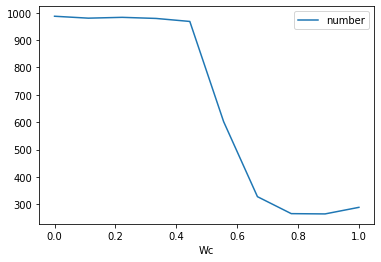

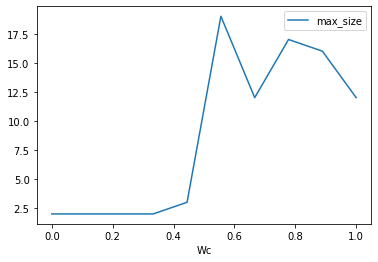

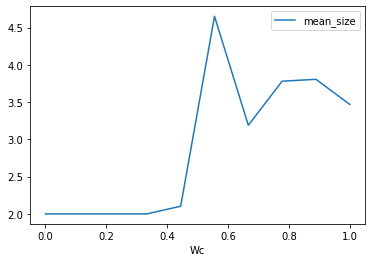

In [130]:
df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='number', style='-')
df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='max_size', style='-')
df[df.time==990][df.psi==1].sort_values('Wc').plot(x='Wc', y='mean_size', style='-')

In [131]:
dfend = df[df.time==990]
c1,bins1 = pd.cut(dfend.Wc, bins=10, retbins=True)
c2,bins2 = pd.cut(dfend.psi, bins=10, retbins=True) 
hm_number = dfend.groupby([c1, c2]).number.mean().unstack()
hm_max_size = dfend.groupby([c1, c2]).max_size.mean().unstack()
hm_mean_size = dfend.groupby([c1, c2]).mean_size.mean().unstack()

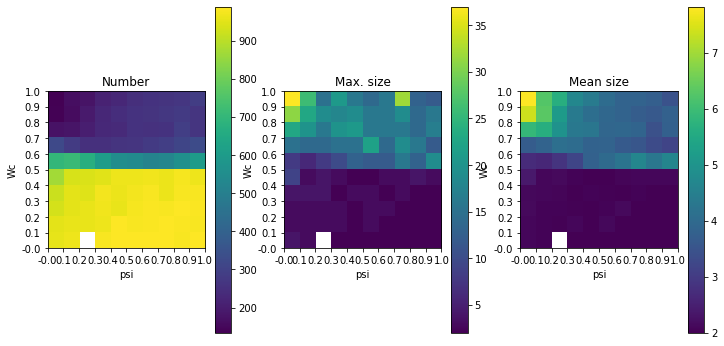

In [132]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(hm_number, origin='lower')
plt.title('Number')
plt.xlabel('psi')
plt.ylabel('Wc')
plt.xticks(np.arange(11)-0.5, np.round(bins2, decimals=2))
plt.yticks(np.arange(11)-0.5, np.round(bins1, decimals=2))
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(hm_max_size, origin='lower')
plt.title('Max. size')
plt.xlabel('psi')
plt.ylabel('Wc')
plt.xticks(np.arange(11)-0.5, np.round(bins2, decimals=2))
plt.yticks(np.arange(11)-0.5, np.round(bins1, decimals=2))
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(hm_mean_size, origin='lower')
plt.title('Mean size')
plt.xlabel('psi')
plt.ylabel('Wc')
plt.xticks(np.arange(11)-0.5, np.round(bins2, decimals=2))
plt.yticks(np.arange(11)-0.5, np.round(bins1, decimals=2))
plt.colorbar()

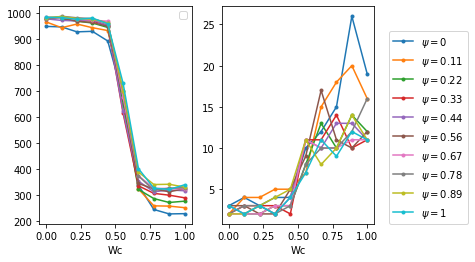

In [133]:
fig,axs = plt.subplots(1,2)
dfend = df[df.time==390]
grouped = dfend.groupby('psi')
for psi,g in grouped:
    g.sort_values('Wc').plot(x='Wc', y='number', ax=axs[0], style='.-')
    g.sort_values('Wc').plot(x='Wc', y='max_size', ax=axs[1], style='.-')
legend = ['$\psi=%0.2g$'%psi for psi,g in grouped]
axs[0].legend([])
axs[1].legend(legend, loc=(1.1,0))

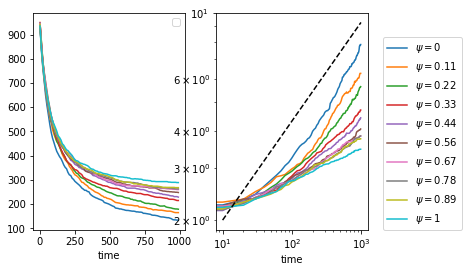

In [136]:
fig,axs = plt.subplots(1,2)
df_Wc1 = df[df.Wc==1]
grouped = df_Wc1.groupby('psi')
for psi,g in grouped:
    g.sort_values('time').plot(x='time', y='number', ax=axs[0], loglog=False)
    g.sort_values('time').plot(x='time', y='mean_size', ax=axs[1], loglog=True)
legend = ['$\psi=%0.2g$'%psi for psi,g in grouped]
axs[0].legend([])
axs[1].legend(legend, loc=(1.1,0))
axs[1].plot([1e1,1e3], [2e0, 10**(np.log10(2)+2/3)], 'k--')

<ipython-input-89-6c6b312f1bd4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df.Wc==1][df.psi==1]
<ipython-input-89-6c6b312f1bd4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[df.Wc==1][df.psi==0]
<ipython-input-89-6c6b312f1bd4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df[df.Wc==0.555556][df.psi==1]
<ipython-input-89-6c6b312f1bd4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df[df.Wc==0.555556][df.psi==0]


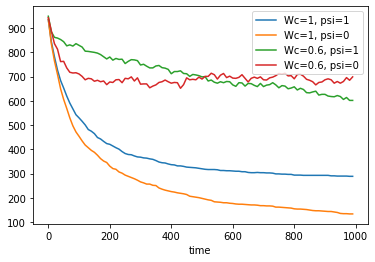

In [89]:
df1 = df[df.Wc==1][df.psi==1]
df2 = df[df.Wc==1][df.psi==0]
df3 = df[df.Wc==0.555556][df.psi==1]
df4 = df[df.Wc==0.555556][df.psi==0]

fig,axs = plt.subplots(1,1)
loglog = False
df1.plot(x='time', y='number', ax=axs, loglog=loglog)
df2.plot(x='time', y='number', ax=axs, loglog=loglog)
df3.plot(x='time', y='number', ax=axs, loglog=loglog)
df4.plot(x='time', y='number', ax=axs, loglog=loglog)
axs.legend(['Wc=1, psi=1', 'Wc=1, psi=0', 'Wc=0.6, psi=1', 'Wc=0.6, psi=0'])

/Users/timrudge/anaconda2/envs/cellmodeller_py3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:177: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


(array([28., 26., 18., 14., 11.,  9.,  5.,  3.,  8.,  0.,  3.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2.  ,  3.75,  5.5 ,  7.25,  9.  , 10.75, 12.5 , 14.25, 16.  ,
        17.75, 19.5 , 21.25, 23.  , 24.75, 26.5 , 28.25, 30.  , 31.75,
        33.5 , 35.25, 37.  ]),
 <BarContainer object of 20 artists>)

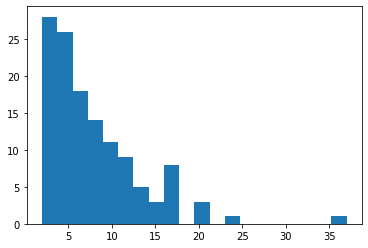

In [90]:
fig,ax = plt.subplots(1,1)
#for wc, g in df_dist.groupby('Wc'):
#    for psi,gg in g.groupby('psi'):
gg = df_dist[(df_dist.time==990) * (df_dist.Wc==1) * (df_dist.psi==0)]
plt.hist(gg['size'], bins=20)

In [75]:
type(df_dist['size'])

pandas.core.series.Series

In [124]:
file_path = '/Users/timrudge/cellmodeller/data'

# Location of the data we want to analyse, assume all folders are results
folders = ['SPPTest_sphere-20-07-30-13-57', 'SPPTest_sphere-20-07-30-14-28']

df_hd = pd.DataFrame(columns=['Wc', 'psi', 'time', 'rad', 'max_size', 'mean_size', 'number'])
df_hd_dist = pd.DataFrame(columns=['Wc', 'psi', 'time', 'rad', 'size'])
N=3000

for folder,rad in zip(folders, [40,30]):
    fname = os.path.join(file_path, folder, 'step-%05d.pickle')
    
    # Look at the first 1000 time steps of this simulation
    for t in range(0,1000,10):
        # Get the cell states
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
        # Construct a graph with cells as nodes and cell-cell contacts as edges
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)
        # Get the sizes of the connected components = clusters
        sizes = [len(c) for c in nx.connected_components(G)]
        if len(sizes)>0:
            # Dominant cluster size
            max_size = np.max(sizes)
            mean_size = np.mean(sizes)
            # Count the number of clusters, including single cells
            number = nx.number_connected_components(G) + N - np.sum(sizes)
            row = {
                'Wc': 1, 
                'psi':0, 
                'time':t, 
                'rad': rad,
                'max_size':max_size, 
                'mean_size':mean_size, 
                'number':number,
            }
            df_hd = df_hd.append(row, ignore_index=True)
            rows = pd.DataFrame()
            rows['size'] = sizes
            rows['Wc'], rows['psi'], rows['time'], rows['rad'] = 1, 0, t, rad
            df_hd_dist = df_hd_dist.append(rows)

In [125]:
df_hd.head()

,Wc,psi,time,rad,max_size,mean_size,number
0,1.0,0.0,0.0,40.0,72.0,5.107784,942.0
1,1.0,0.0,10.0,40.0,232.0,14.497537,260.0
2,1.0,0.0,20.0,40.0,259.0,19.490196,171.0
3,1.0,0.0,30.0,40.0,263.0,24.500000,133.0
4,1.0,0.0,40.0,40.0,298.0,29.643564,107.0


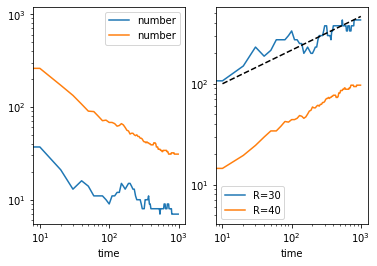

In [137]:
fig,axs = plt.subplots(1,2)
legend = []
for rad,g in df_hd.groupby('rad'):
    g.sort_values('time').plot(x='time', y='number', ax=axs[0], loglog=True)
    g.sort_values('time').plot(x='time', y='mean_size', ax=axs[1], loglog=True)
    legend.append('R=%g'%rad)
axs[1].legend(legend)
axs[1].plot([1e1,1e3], [1e2, 10**(2+2/3)], 'k--')